In [69]:
# Import packages

import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("...")

# Read data into dataframe

df = pd.read_fwf("C:/Portfolio/Data Engineer Track/Python/Uzaki chan Text Analytics/Transcriptions/S1_S2_combined/S1_S2_combined.txt", sep = " ",  header = None)

# Print head

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Now there's a sight for sore eyes. Nothing say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,That's right. Hana Uzaki.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Hi, I'm your underclassman again. Wait, are yo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The college? Afraid not. I mean, they don't ev...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,But you worked so hard at it in high school.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

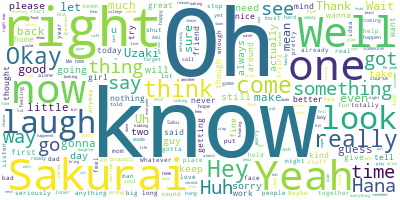

In [70]:
# Import the wordcloud library

from wordcloud import WordCloud

# Join the different processed words together.

long_string = ','.join(list(df[0].values))

# Creat a WordCloud object

wordcloud = WordCloud(background_color = "white", max_words = 30000, contour_width = 3, contour_color = "steelblue")

# Generate a WordCloud

wordcloud.generate(long_string)

# Visualize the word cloud

wordcloud.to_image()

# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df[0].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Prepare data for LDA Analysis.

In [71]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words.extend(["oh", "uh", "well", "yeah", "hey", "see", "could", "yet", "would", "said", "much", "like", "thing", "things", "really", "huh", "right", "say", "sure", 
"got", "get", "know", "hmmm", "mm", "anything", "whatever", "let", "ah", "wanna", "though", "going", "nothing", "make", "already", "hmm", "gonna", "ready", "still", 
"tell", "one", "need", "gotta", "something", "might", "good", "great", "okay", "guess", "cool", "two", "go", "fine", "wow", "keep", "totally", "cuz", "happened",
"looks", "kind", "take", "back", "mean", "actually", "since", "even"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence),
deacc = True))

def remove_stopwords(texts): 
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = df[0].values.tolist()
data_words = list(sent_to_words(data))

# Remove stop words

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sight', 'sore', 'eyes', 'says', 'spring', 'quite', 'uzaki']


In [72]:
# Import gensim packages and create dictionary

import gensim.corpora as corpora

# Create Dictionary

id2word = corpora.Dictionary(data_words)

# Create Corpus

texts = data_words

# Term Document Frequency

corpus = [id2word.doc2bow(text) for text in texts]

# View 

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


# Establish the number of topics to create.

In [73]:

from pprint import pprint

# number of topics

num_topics = 10

# Build LDA model 

lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = num_topics)

# Print the keyword in the 10 topics

pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.010*"look" + 0.010*"think" + 0.008*"thought" + 0.007*"pretty" + '
  '0.006*"thanks" + 0.006*"time" + 0.006*"mom" + 0.006*"come" + 0.005*"little" '
  '+ 0.005*"us"'),
 (1,
  '0.013*"think" + 0.012*"sakurai" + 0.007*"way" + 0.006*"wait" + 0.006*"come" '
  '+ 0.006*"time" + 0.006*"sounds" + 0.006*"look" + 0.005*"day" + '
  '0.005*"hana"'),
 (2,
  '0.009*"laugh" + 0.008*"think" + 0.008*"thanks" + 0.008*"school" + '
  '0.007*"sorry" + 0.006*"look" + 0.006*"thought" + 0.005*"come" + '
  '0.005*"wrong" + 0.005*"high"'),
 (3,
  '0.017*"time" + 0.011*"first" + 0.009*"big" + 0.008*"home" + 0.007*"next" + '
  '0.006*"must" + 0.006*"guy" + 0.005*"friend" + 0.005*"ami" + 0.005*"uzaki"'),
 (4,
  '0.015*"laugh" + 0.010*"think" + 0.009*"never" + 0.008*"way" + '
  '0.006*"little" + 0.006*"sorry" + 0.005*"thought" + 0.005*"big" + '
  '0.005*"away" + 0.005*"forget"'),
 (5,
  '0.011*"sakurai" + 0.010*"time" + 0.009*"yes" + 0.009*"please" + '
  '0.009*"look" + 0.008*"hana" + 0.008*"sorry" + 0.007

# Visualize the topics.

In [74]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

# Visualize the topics

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('c:/Portfolio/Data Engineer Track/Python/Uzaki chan Text Analytics/Transcriptions/S1_S2_combined/S1_S2_combined.txt'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
    

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'c:/Portfolio/Data Engineer Track/Python/Uzaki chan Text Analytics/Transcriptions/S1_S2_combined/S1_S2_combined.txt' +
str(num_topics) + ".html")

LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.050980 -0.014071       1        1  12.152480
1     -0.021739  0.036181       2        1  11.501898
7     -0.040231  0.071910       3        1  11.029478
3     -0.046829  0.043012       4        1  10.632639
5     -0.019395  0.026196       5        1  10.569774
6      0.083052  0.024306       6        1   9.821355
8      0.047800  0.015004       7        1   9.084435
4      0.097013 -0.027249       8        1   8.900942
0     -0.058340 -0.104186       9        1   8.328587
2      0.009650 -0.071103      10        1   7.978411, topic_info=      Term        Freq       Total Category  logprob  loglift
155  laugh  166.000000  166.000000  Default  30.0000  30.0000
75    come  150.000000  150.000000  Default  29.0000  29.0000
317   stop   52.000000   52.000000  Default  28.0000  28.0000
65    time  167.000000  167.000000  Default  27.0000  27.0000
7     hana  136.000000  136.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
12    wait    7.842224  107.554497  Topic10  -5.4738  -0.0900
258   mind    6.546576   59.395379  Topic10  -5.6544   0.3232
908    ami    5.738946   38.514744  Topic10  -5.7861   0.6247
33    real    6.082243   52.208770  Topic10  -5.7280   0.3786
264    yes    5.905474   54.698641  Topic10  -5.7575   0.3025

[852 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3026      1  0.789991     account
461       1  0.202371      active
461       5  0.607113      active
461       6  0.202371      active
2438      1  0.199421  activities
...     ...       ...         ...
264       6  0.054846         yes
264       7  0.054846         yes
264       8  0.036564         yes
264      10  0.109692         yes
1868      6  0.620166        yonk

[2466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 8, 4, 6, 7, 9, 5, 1, 3])

# Lastly, here's a more traditional word cloud of the top words in each topic is below. 

c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\rakim\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

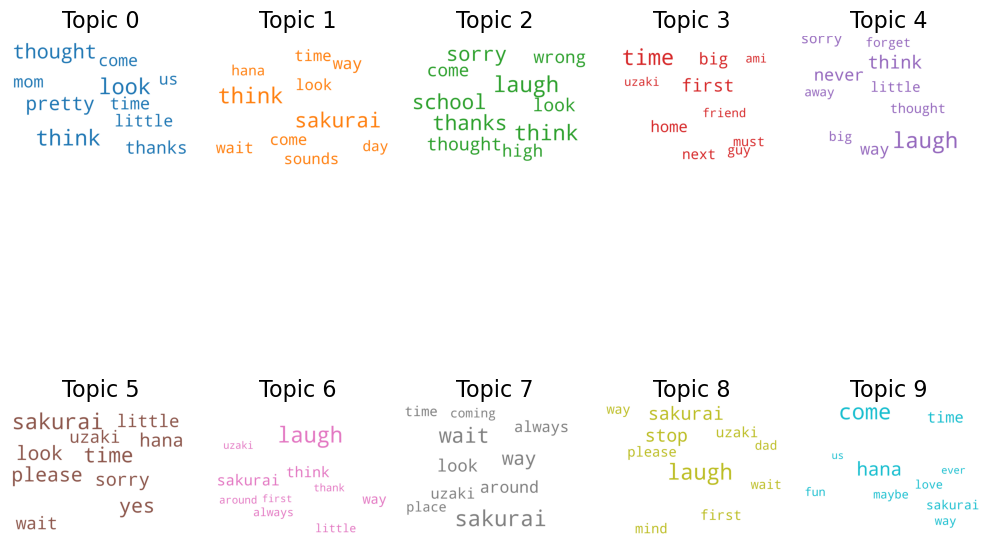

In [78]:
# Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()